## AI Agent智能应用从0到1定制开发 
## AI Agent Intelligent Application Custom Development from 0 to 1
******
- 此代码为网课《AI Agent智能应用从0到1定制开发》的配套代码，需要注意本套代码建议与网课适配配合食用。
- This code for the online course <AI Agent Intelligent Applications from 0 to 1 custom development> supporting code, need to pay attention to this set of code is recommended with the online course adapted to work with consumption.
- 需要注意由于课程开发周期的原因，langchain版本跨越了3个大版本，部分代码会与视频演示有差别!
- Note that due to the course development cycle, the langchain version spans 3 major releases and some of the code will differ from the video demo!
- 课程地址：https://coding.imooc.com/class/822.html
- Course address: https://coding.imooc.com/class/822.html

### 从环境变量中读取密钥
### Read the key from the environment variable
- 注意：尽量将你的OpenAI Key存储在类似.env文件中，而不是明文暴露在代码里，这是一种基本的安全措施
- Note: Try to store your OpenAI Key in something like an .env file, rather than exposing it explicitly in code, as a basic safety measure!
******

In [1]:

import os
from dotenv import load_dotenv
# Load environment variables from openai.env file
load_dotenv("asset/openai.env")

# Read the OPENAI_API_KEY from the environment
api_key = os.getenv("OPENAI_API_KEY")
api_base = os.getenv("OPENAI_API_BASE")
os.environ["OPENAI_API_KEY"] = api_key
os.environ["OPENAI_API_BASE"] = api_base
os.environ["SERPAPI_API_KEY"] = os.getenv("SERPAPI_API_KEY")
os.environ["ELEVEN_API_KEY"] = os.getenv("ELEVEN_API_KEY")
os.environ["AZURE_COGS_KEY"] = os.getenv("AZURE_COGS_KEY")
os.environ["AZURE_COGS_ENDPOINT"] = os.getenv("AZURE_COGS_ENDPOINT")
os.environ["AZURE_COGS_REGION"] = os.getenv("AZURE_COGS_REGION")
os.environ["DASHSCOPE_API_KEY"] = os.getenv("DASHSCOPE_API_KEY")
os.environ["ZHIPUAI_API_KEY"] = os.getenv("ZHIPUAI_API_KEY")
zhipukey =  os.getenv("ZHIPUAI_API_KEY")
os.environ["TAVILY_API_KEY"] = os.getenv("TAVILY_API_KEY")
os.environ["MOONSHOT_API_KEY"] = os.getenv("MoonShot_key")
MoonShot_key = os.getenv("MoonShot_key")
os.environ["BAICHUAN_API_KEY"] = os.getenv("BAICHUAN_API_KEY")

### LangGraph的图可视化
### Graph Visualization of LangGraph
****

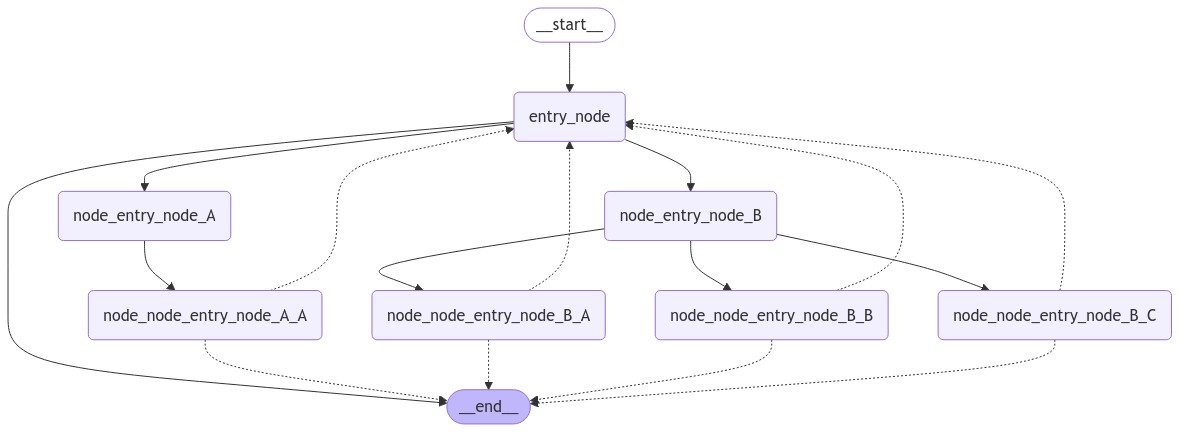

In [4]:
import random
from langgraph.graph import StateGraph
from langgraph.graph.message import add_messages
from typing_extensions import TypedDict
from typing import Annotated, Literal


class State(TypedDict):
    messages: Annotated[list, add_messages]


class MyNode:

    def __init__(self, name: str):
        self.name = name

    def __call__(self, state: State):
        return {"messages": [("assistant", f"Called node {self.name}")]}


def route(state) -> Literal["entry_node", "__end__"]:
    if len(state["messages"]) > 10:
        return "__end__"
    return "entry_node"


def add_fractal_nodes(builder, current_node, level, max_level):
    if level > max_level:
        return

    # Number of nodes to create at this level
    num_nodes = random.randint(1, 3)  # Adjust randomness as needed
    for i in range(num_nodes):
        nm = ["A", "B", "C"][i]
        node_name = f"node_{current_node}_{nm}"
        builder.add_node(node_name, MyNode(node_name))
        builder.add_edge(current_node, node_name)

        # Recursively add more nodes
        r = random.random()
        if r > 0.2 and level + 1 < max_level:
            add_fractal_nodes(builder, node_name, level + 1, max_level)
        elif r > 0.05:
            builder.add_conditional_edges(node_name, route, node_name)
        else:
            # End
            builder.add_edge(node_name, "__end__")


def build_fractal_graph(max_level: int):
    builder = StateGraph(State)
    entry_point = "entry_node"
    builder.add_node(entry_point, MyNode(entry_point))
    builder.set_entry_point(entry_point)

    add_fractal_nodes(builder, entry_point, 1, max_level)

    # Optional: set a finish point if required
    builder.set_finish_point(entry_point)  # or any specific node

    return builder.compile()


app = build_fractal_graph(3)

#print(app.get_graph().print_ascii())
from langchain_core.runnables.graph import CurveStyle, NodeStyles, MermaidDrawMethod
from IPython.display import Image, display

# 假设 app 是你的应用程序实例，并且已经初始化
# 生成图片
graph_image = app.get_graph().draw_mermaid_png(
    draw_method=MermaidDrawMethod.API)

# 显示图片
display(Image(data=graph_image))

